# **N Queens**

In [19]:
!pip install mlrose-hiive

In [20]:
import mlrose_hiive
import matplotlib.pyplot as plt
import time

In [21]:
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt

fitness_cust = mlrose_hiive.CustomFitness(queeens_max)

In [40]:
number_of_queens = 64
attempts = 10
iters = 100
restarts = 10
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.095, min_temp=0.1)
problem = mlrose_hiive.DiscreteOpt(length=number_of_queens, fitness_fn=fitness_cust, maximize=True, max_val=number_of_queens)

# **Random Hill Climb**

In [41]:
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_best_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, init_state=None, curve=True, random_state=None, restarts=restarts)
print("--- %s RHC seconds ---" % (time.time() - start_time))

--- 2.169750452041626 RHC seconds ---


# **Simulated Annealing**

In [42]:
start_time = time.time()
sa_best_state, sa_best_fitness, sa_best_curve = mlrose_hiive.simulated_annealing(problem, schedule=schedule, max_attempts=attempts, max_iters=iters, init_state=None, curve=True, random_state=None)
print("--- %s SA seconds ---" % (time.time() - start_time))

--- 0.4941751956939697 SA seconds ---


# **Genetic Alg**

In [25]:
start_time = time.time()
ga_best_state, ga_best_fitness, ga_best_curve = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=attempts, max_iters=iters, curve=True, random_state=None)
print("--- %s GA seconds ---" % (time.time() - start_time))

--- 14.052618026733398 GA seconds ---


# **MIMIC**

In [26]:
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_best_curve = mlrose_hiive.mimic(problem, pop_size=500, keep_pct=0.2, max_attempts=attempts, max_iters=iters, curve=True, random_state=None)
print("--- %s MIMIC seconds ---" % (time.time() - start_time))

--- 82.90844488143921 MIMIC seconds ---


# **Curves**

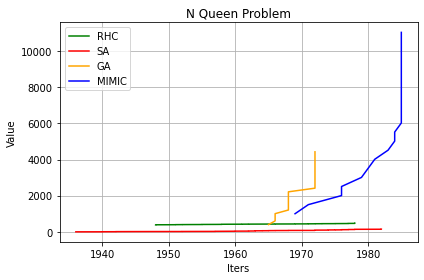

In [43]:
plt.grid()
rhc_x = [x[0] for x in rhc_best_curve]
rhc_y = [x[1] for x in rhc_best_curve]
sa_x = [x[0] for x in sa_best_curve]
sa_y = [x[1] for x in sa_best_curve]
ga_x = [x[0] for x in ga_best_curve]
ga_y = [x[1] for x in ga_best_curve]
mimic_x = [x[0] for x in mimic_best_curve]
mimic_y = [x[1] for x in mimic_best_curve]
plt.plot(rhc_x, rhc_y,color='green', label="RHC")
plt.plot(sa_x, sa_y, color='red', label="SA")
plt.plot(ga_x, ga_y, color='orange', label="GA")
plt.plot(mimic_x, mimic_y, color='blue', label="MIMIC")
plt.xlabel("Iters"), plt.ylabel("Value"), plt.legend(loc="best"), plt.title("N Queen Problem")
plt.tight_layout()
plt.show()